In [1]:
%load_ext autoreload
%autoreload 2

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import binom
from matplotlib.ticker import StrMethodFormatter

## Setup and Distributions

In [3]:
def plot_binomial_distribution(n, p):
    # create a binomial distribution object
    dist = binom(n, p)

    # generate x values from 0 to n
    x = np.arange(n+1)

    # calculate the probability mass function (PMF) for each x value
    pmf = dist.pmf(x)

    # create a line plot of the PMF using Seaborn
    sns.lineplot(x=x, y=pmf,label=str(p))

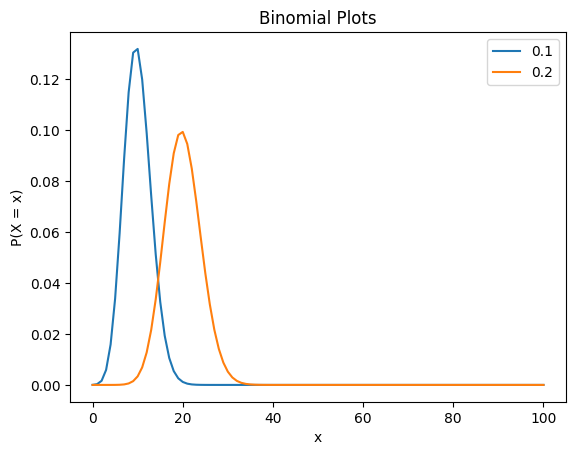

In [4]:
plot_binomial_distribution(100,0.1)
plot_binomial_distribution(100,0.2)
plt.xlabel('x')
plt.ylabel('P(X = x)')
plt.title("Binomial Plots")
plt.legend()

## Success Probability

In [51]:
def success_probability(n,p,A,p_prime,k):
    dist_1 = binom(n-k,p)
    dist_2 = binom(k,p_prime)
    total_prob = 0

    for i in range(A,n+1):
        min_possible = 0
        max_possible = min(A,k)

        for k_right in range(min_possible,max_possible+1):
            prob_k = dist_2.pmf(k_right)
            prob_other = dist_1.pmf(i-k_right)
            total_prob += prob_k*prob_other

    return total_prob

In [55]:
success_probability(100,0.8,80,0.9,20)

0.7484984977424062

In [67]:
success_probability(100,0.8,80,0.9,50)

0.9356245211452082

In [68]:
success_probability(100,0.8,80,0.9,0)

0.5594615848733976

In [69]:
success_probability(100,0.8,80,1,1)

0.5793216278351632

In [62]:
n_fixed = 100
A_fixed = 85
p_fixed = 0.8
p_prime_vals = np.arange(0.6,1.01,0.05)
k_vals = np.arange(0,51,5)

In [70]:
baseline = success_probability(n_fixed,p_fixed,A_fixed,0,0)

In [71]:
values = np.zeros((len(p_prime_vals),len(k_vals)))
for i,p_prime in enumerate(p_prime_vals):
    for j,k in enumerate(k_vals):
        p_prime = min(p_prime,1)
        values[i,j] = round((success_probability(n_fixed,p_fixed,A_fixed,p_prime,k)-baseline)*100)

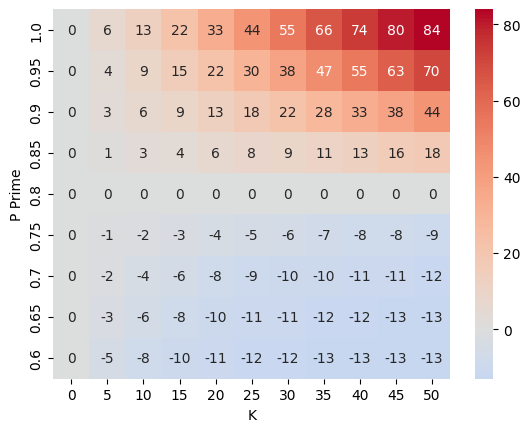

In [72]:
ax = sns.heatmap(values,xticklabels=[round(i,2) for i in k_vals], yticklabels=[round(i,2) for i in p_prime_vals],
                 center=0, cmap='coolwarm', annot=True)
ax.invert_yaxis()
plt.xlabel("K")
plt.ylabel("P Prime")
plt.show()

In [66]:
k_fixed = 20

In [79]:
x = np.linspace(0,1,1000)
y = success_probability(n_fixed,p_fixed,A_fixed,x,k_fixed)-baseline

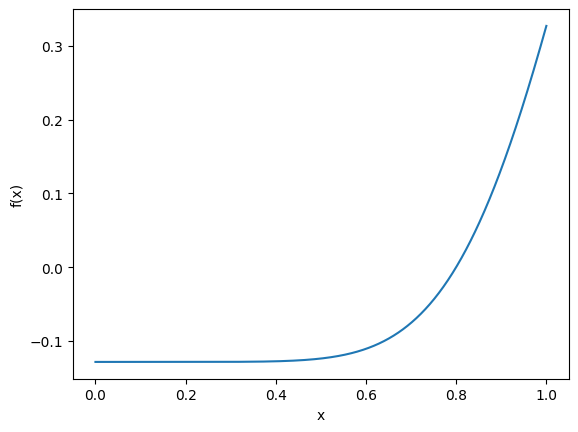

In [80]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [83]:
x = np.linspace(0.7,0.9,100)
y = success_probability(n_fixed,p_fixed,A_fixed,x,k_fixed)-baseline

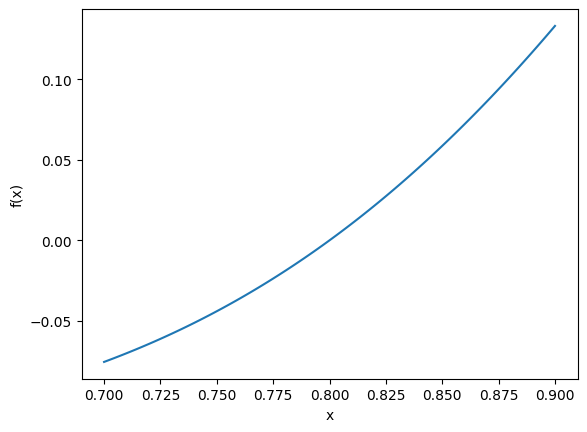

In [84]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()